In [39]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler



In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#import the dataset
df = pd.read_csv("/content/drive/MyDrive/COPD Paper/CSV FILE/COPDP.csv")
df.shape
df.head()

,Name,Age,Sex,Cough,Breathe Shortness,Inhaler,Smoker,Wheeze,Chest pain,Respiration rate,FEV1/FVC,FVC,Occupation,Restless,COPD
0,Amjad,50,0,1,1,1,1,1,0,0,2,2,0,1,1
1,Rafiq,48,0,1,1,0,0,0,1,1,1,1,1,1,0
2,Sattar Mia,55,0,1,1,0,1,1,1,1,0,4,2,0,1
3,Biplop,30,0,1,1,0,1,1,0,1,3,1,0,0,0
4,Salam,56,0,1,1,1,0,0,0,1,5,2,0,1,1


In [42]:
df['COPD'].value_counts()

1    53
0    48
Name: COPD, dtype: int64

In [43]:
#check the name of the column
df.columns

Index(['Name', 'Age ', 'Sex', 'Cough', 'Breathe Shortness', 'Inhaler',
       'Smoker', 'Wheeze', 'Chest pain', 'Respiration rate', 'FEV1/FVC ',
       'FVC ', 'Occupation', 'Restless', 'COPD'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


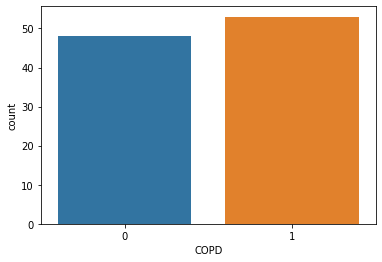

In [44]:
import seaborn
seaborn.countplot(df['COPD'])

In [45]:
df.isna().sum()

Name                 0
Age                  0
Sex                  0
Cough                0
Breathe Shortness    0
Inhaler              0
Smoker               0
Wheeze               0
Chest pain           0
Respiration rate     0
FEV1/FVC             0
FVC                  0
Occupation           0
Restless             0
COPD                 0
dtype: int64

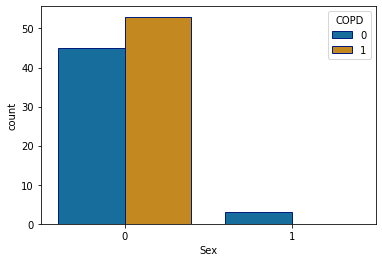

In [46]:
seaborn.countplot(x='Sex',hue='COPD',data=df,palette='colorblind',edgecolor= seaborn.color_palette('dark',n_colors=1))

In [47]:
seaborn.countplot(x='Age',hue='COPD',data=df,palette='colorblind',edgecolor= seaborn.color_palette('dark',n_colors=1))

ValueError: ignored

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
seaborn.countplot(x='FEV1/FVC',hue='COPD',data=df,palette='colorblind',edgecolor= seaborn.color_palette('dark',n_colors=1))

In [ ]:
df=df.drop(['Name'],axis=1)

In [ ]:
# Split data into X and y
X = df.drop("COPD", axis=1)

y = df["COPD"]

In [ ]:
X

In [ ]:
y

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)


In [ ]:
##Logistic Regression,K-Nearest Neighbours Classifier,Random Forest Classifier
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          "Naive Bayes classifier": MultinomialNB()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
ytrain_pred_probablility = decision_tree.predict_proba(X_train)

ytest_pred_probablility = decision_tree.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
ytrain_pred_probablility = knn_classifier.predict_proba(X_train)

ytest_pred_probablility = knn_classifier.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(random_state=10)
Logistic.fit(X_train, y_train)
y_pred = Logistic.predict(X_test)
ytrain_pred_probablility = Logistic.predict_proba(X_train)

ytest_pred_probablility = Logistic.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB= MultinomialNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
ytrain_pred_probablility = NB.predict_proba(X_train)

ytest_pred_probablility = NB.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))